In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Install dependencies

In [2]:
!pip install requests beautifulsoup4 pandas matplotlib --quiet

# Import required libraries

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Scrape multiple pages from the website

In [4]:
all_books = []

for page in range(1, 6): 
    url = f"https://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
     # Parse HTML
    soup = BeautifulSoup(response.text, 'html.parser')
    books = soup.find_all('article', class_='product_pod')
    
    # Extract data for each book
    for book in books:
        title = book.h3.a['title']
        price = book.find('p', class_='price_color').text.strip()
        price = price.encode('ascii', 'ignore').decode('utf-8') 
        price = price.replace('£', '').strip()

        availability = book.find('p', class_='instock availability').text.strip()
        
        all_books.append({
            'Title': title,
            'Price (£)': float(price),
            'Availability': availability
        })

# Convert to DataFrame

In [5]:
df = pd.DataFrame(all_books)
print("✅ Preview of scraped data:")
display(df.head())

✅ Preview of scraped data:


,Title,Price (£),Availability
0,A Light in the Attic,51.77,In stock
1,Tipping the Velvet,53.74,In stock
2,Soumission,50.10,In stock
3,Sharp Objects,47.82,In stock
4,Sapiens: A Brief History of Humankind,54.23,In stock


# Save dataset

In [6]:
df.to_csv('books_scraped.csv', index=False)
print("💾 Dataset saved as books_scraped.csv")

💾 Dataset saved as books_scraped.csv


# Data Analysis Section

**Summary statistics**

In [7]:
print("\n📈 Summary of book prices:")
display(df['Price (£)'].describe())


📈 Summary of book prices:


count    100.000000
mean      34.560700
std       14.638531
min       10.160000
25%       19.897500
50%       34.775000
75%       47.967500
max       58.110000
Name: Price (£), dtype: float64

**Most common availability status**

In [8]:
print("\n📦 Availability counts:")
display(df['Availability'].value_counts())


📦 Availability counts:


Availability
In stock    100
Name: count, dtype: int64

**Visualize price distribution**

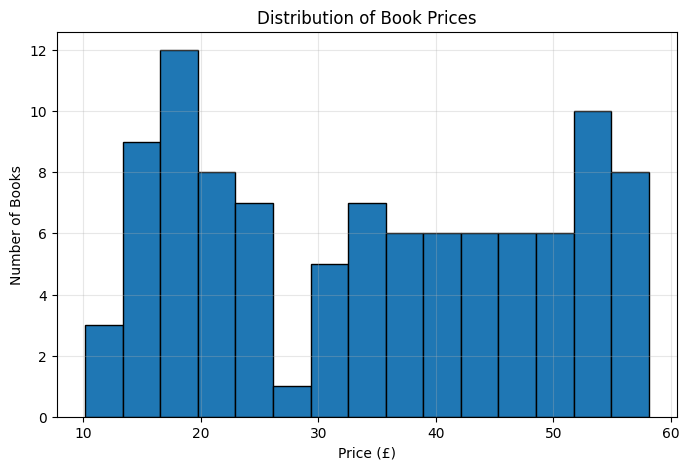

In [9]:
plt.figure(figsize=(8,5))
plt.hist(df['Price (£)'], bins=15, edgecolor='black')
plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Number of Books')
plt.grid(True, alpha=0.3)
plt.show()

 ****Most Expensive Books****

In [10]:
top_books = df.sort_values(by='Price (£)', ascending=False).head(10)
print("\n💰 Top 10 Most Expensive Books:")
display(top_books)


💰 Top 10 Most Expensive Books:


,Title,Price (£),Availability
68,The Death of Humanity: and the Case for Life,58.11,In stock
40,Slow States of Collapse: Poems,57.31,In stock
15,Our Band Could Be Your Life: Scenes from the A...,57.25,In stock
58,The Past Never Ends,56.50,In stock
57,The Pioneer Woman Cooks: Dinnertime: Comfort C...,56.41,In stock
91,Masks and Shadows,56.40,In stock
56,The Secret of Dreadwillow Carse,56.13,In stock
67,The Electric Pencil: Drawings from Inside Stat...,56.06,In stock
25,Birdsong: A Story in Pictures,54.64,In stock
4,Sapiens: A Brief History of Humankind,54.23,In stock
